# Car Price Prediction with Machine Learning

**Loading necessary Libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

**Importing Dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('car data.csv')

Saving car data.csv to car data.csv


**Data Pre-Processing**

In [ ]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

**Feature Selection**

In [ ]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


The following features would make a difference on the selling price of the cars : Year, Present_Price, Driven_kms, Fuel_type, Selling_type, Transmission, Owner

**Splitting Data**

The dataset will be divided in a 70-30 ratio, where 70% will be used for training and 30% for testing

In [ ]:
X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Selection**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

X = df[['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

label_encoder = LabelEncoder()
for feature in categorical_features:
    X_train[feature] = label_encoder.fit_transform(X_train[feature])
    X_test[feature] = label_encoder.transform(X_test[feature])

linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()
svr_reg = SVR()
gradient_boosting_reg = GradientBoostingRegressor()

linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)

linear_reg_score = linear_reg.score(X_test, y_test)
decision_tree_reg_score = decision_tree_reg.score(X_test, y_test)
random_forest_reg_score = random_forest_reg.score(X_test, y_test)
svr_reg_score = svr_reg.score(X_test, y_test)
gradient_boosting_reg_score = gradient_boosting_reg.score(X_test, y_test)

print("Linear Regression Score:", linear_reg_score)
print("Decision Tree Regression Score:", decision_tree_reg_score)
print("Random Forest Regression Score:", random_forest_reg_score)
print("SVR Regression Score:", svr_reg_score)
print("Gradient Boosting Regression Score:", gradient_boosting_reg_score)

Linear Regression Score: 0.8772443540167388
Decision Tree Regression Score: 0.9499251347108486
Random Forest Regression Score: 0.9630578525601842
SVR Regression Score: -0.07644376927612107
Gradient Boosting Regression Score: 0.9565782102316102


According to the scores, Decision Tree and Random Forest performs best with the data with R^2 score close to 1. Therefore, we select the Decision Tree model

**Model Training**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

categorical_cols = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in categorical_cols:
    X_encoded[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print("Model R^2 Score:", score)

Model R^2 Score: 0.9426608435986015


**Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)
r_squared = model.score(X_test, y_test)
print("R-squared Score:", r_squared)

Mean Squared Error: 1.3208409836065576
Root Mean Squared Error: 1.149278462169442
Mean Absolute Error: 0.7562295081967212
R-squared Score: 0.9426608435986015


**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8683513102321306


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


**Model Interpretation**

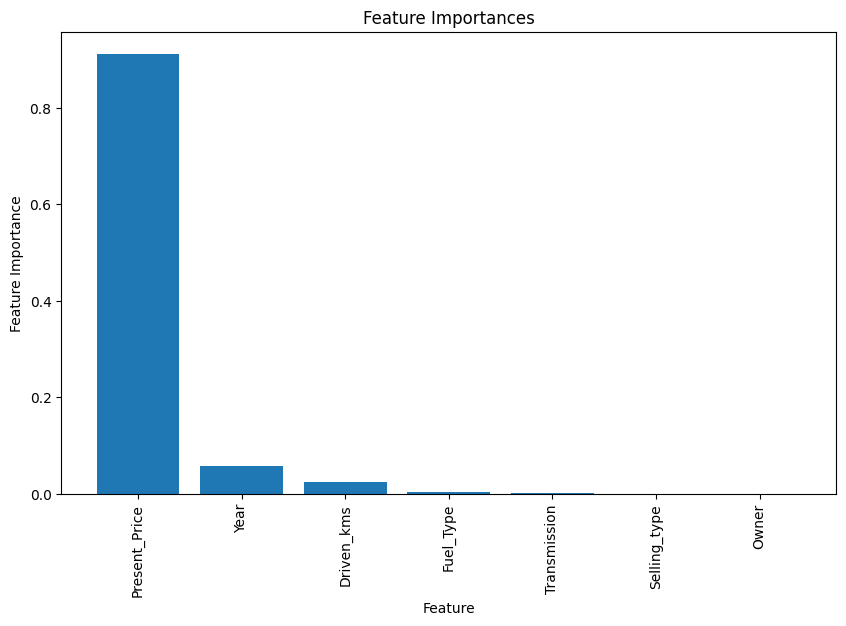

In [ ]:
feature_importances = model.feature_importances_

import matplotlib.pyplot as plt

feature_names = X.columns

sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.xticks(range(X.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.show()